In [1]:
#
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12.5, 4)

In [2]:
# Datos

N = 192415
positive = 10000



In [3]:
# Definicion de los parametros de las a priori
a_theta = 15; b_theta = 94092
a_lambda1 = 142; b_lambda1 = 1
a_lambda0 = 3; b_lambda0 = 1363

# Definicion de las a priori

theta = pm.Beta('theta', a_theta, b_theta)
lambda1 = pm.Beta('lambda1', a_lambda1, b_lambda1)
lambda0 = pm.Beta('lambda0', a_lambda0, b_lambda0)



In [4]:
samples_lambda0 = 0

samples_lambda1 = 0
samples_theta = 0


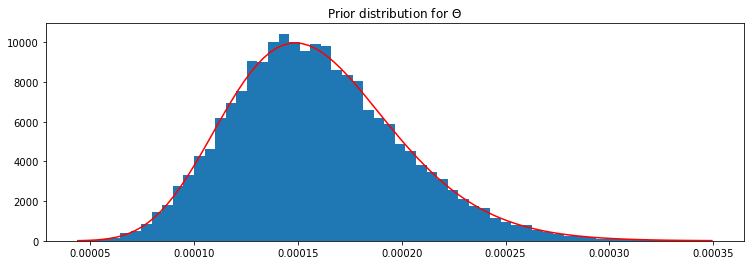

In [5]:
# Ploteamos
# theta
priori_cont_theta = st.beta(a_theta, b_theta)
theta_mean = priori_cont_theta.mean()

if samples_theta == 0:
    samples_theta = [theta.random() for i in range(20000)] 


plt.hist(samples_theta, bins=60, normed=True, histtype="stepfilled")

rango = np.array([min(samples_theta), max(samples_theta)]) 
rango = np.linspace(rango[0], rango[1], 100)
plt.plot(rango, priori_cont_theta.pdf(rango), color = 'r', label = 'a = 3, b = 4')

plt.title("Prior distribution for $\Theta$")
plt.show()
#plt.xlim(0, 8);


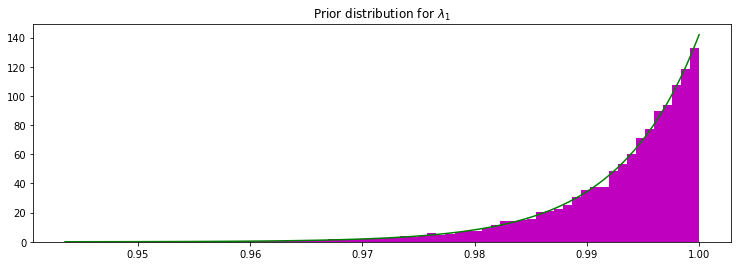

In [11]:
# Ploteamos
# theta
priori_cont_lambda1 = st.beta(a_lambda1, b_lambda1)
lambda1_mean = priori_cont_lambda1.mean()


if samples_lambda1 == 0:
    samples_lambda1 = [lambda1.random() for i in range(20000)] 
plt.hist(samples_lambda1, bins=70, normed=True, histtype="stepfilled", color = 'm')

rango = np.array([min(samples_lambda1), max(samples_lambda1)]) 
rango = np.linspace(rango[0], rango[1], 100)
plt.plot(rango, priori_cont_lambda1.pdf(rango), color = 'g')

plt.title("Prior distribution for $\lambda_1$")
#plt.xlim(0, 8);

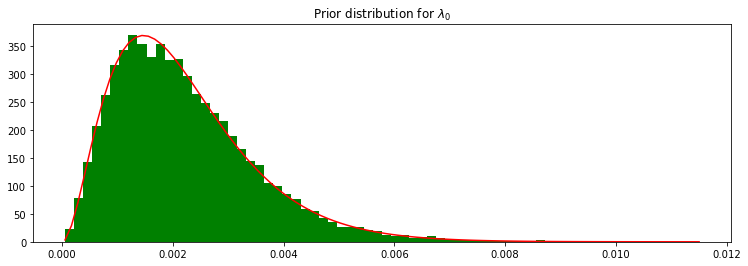

In [9]:
# Ploteamos
# theta

priori_cont_lambda0 = st.beta(a_lambda0, b_lambda0)
lambda1_mean = priori_cont_lambda0.mean()

if samples_lambda0 == 0:
    samples_lambda0 = [lambda0.random() for i in range(20000)] 
plt.hist(samples_lambda0, bins=70, normed=True, histtype="stepfilled", color = 'g')


rango = np.array([min(samples_lambda0), max(samples_lambda0)]) 
rango = np.linspace(rango[0], rango[1], 100)
plt.plot(rango, priori_cont_lambda0.pdf(rango), color = 'r')

plt.title("Prior distribution for $\lambda_0$")
#plt.xlim(0, 8);

In [8]:
# Definicion de la verosimilitud


@pm.deterministic
def custom_stochastic(value = positive):
   
    L = np.power((theta*lambda1 + (1 - theta)*lambda0), value) * np.power((theta*(1 - lambda1) + (1 - theta)*(1 - lambda0)), N - value)

    return L


In [9]:
modelo = pm.Model([theta, lambda1, lambda0, positive])
mcmc = pm.MCMC(modelo)
mcmc.sample(100000, burn = 10000)

 [-----------------100%-----------------] 100000 of 100000 complete in 70.5 sec

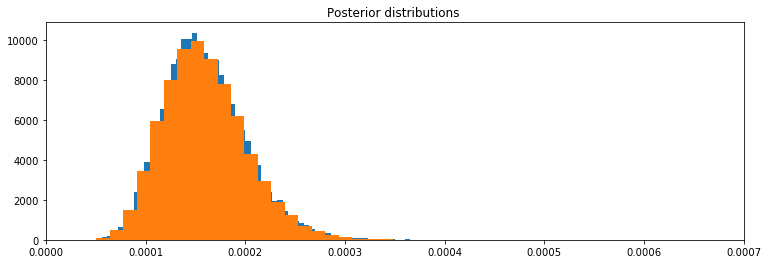

In [18]:
figsize(12.5, 4)
plt.title("Posterior distributions ")


plt.hist(samples_theta, bins=60, normed=True, histtype="stepfilled")
plt.hist(mcmc.trace("theta")[:], bins=25, histtype="stepfilled", normed=True)
plt.xlim(0,0.0007 );
plt.show()
